In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sys 
import os

# this line walks up file directory so rule-vetting is cwd
# Currently this breaks if chunk is run multiple times
os.chdir(os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))))
print(os.getcwd())

import rulevetting.api.viz as viz
from rulevetting.projects.csi_pecarn.dataset import Dataset
from rulevetting.projects.csi_pecarn.tree_functions import *
from rulevetting.projects.csi_pecarn.baseline import Baseline
from rulevetting.projects.csi_pecarn.model_best import SpecialTree

from sklearn import tree
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay

/accounts/grad/wtorous/.local/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


/accounts/grad/wtorous/rule-vetting


In [2]:
def classify_experiment_results(experiment_df):
    # compute confusion matrix entries
    TN = experiment_df[ (experiment_df['pred'] == 0) & (experiment_df['csi_injury'] == 0)].shape[0]
    TP = experiment_df[ (experiment_df['pred'] == 1) & (experiment_df['csi_injury'] == 1)].shape[0]
    FN = experiment_df[ (experiment_df['pred'] == 0) & (experiment_df['csi_injury'] == 1)].shape[0]
    FP = experiment_df[ (experiment_df['pred'] == 1) & (experiment_df['csi_injury'] == 0)].shape[0]
    sensitivity = TP/(FN+TP)
    specificity = TN/(FP+TN)
    confusion_data = None
            
    return (sensitivity, specificity)

In [3]:
def get_single_outcomes(df_ran):
    
    df0 = df_ran[0]
    df1 = df_ran[1]
    df2 = df_ran[2]
    data_train = pd.concat([df0,df1])
    data_test = df2
    
    results_dict = {}

    #####
    # SpecialTree on training+tuning

    pred_train = SpecialTree().predict(data_train)
    evaluate = pd.DataFrame(data = {'csi_injury': data_train['csi_injury'], 
                                    'pred': pred_train})
    st_results = classify_experiment_results(evaluate)
    
    #####
    # Baseline on training+tuning

    pred_train = Baseline().predict(data_train)
    evaluate = pd.DataFrame(data = {'csi_injury': data_train['csi_injury'], 
                                    'pred': pred_train})
    bt_results = classify_experiment_results(evaluate)
    #####
    # SpecialTree on on unseen testing

    pred_test = SpecialTree().predict(data_test)
    evaluate = pd.DataFrame(data = {'csi_injury': data_test['csi_injury'], 
                                    'pred': pred_test})
    stt_results = classify_experiment_results(evaluate)
    #####
    # Baseline on unseen testing

    pred_test = Baseline().predict(data_test)
    evaluate = pd.DataFrame(data = {'csi_injury': data_test['csi_injury'], 
                                    'pred': pred_test})
    btt_results = classify_experiment_results(evaluate)
    
    results_tuple = (st_results[0],st_results[1],bt_results[0],bt_results[1],stt_results[0],stt_results[1],btt_results[0],btt_results[1])
    print(results_tuple)
    return results_tuple

In [4]:
jc_dfs = Dataset().get_data(control_types=['ran'],run_perturbations=True)

100%|██████████| 12/12 [00:00<00:00, 66.15it/s]

read all the csvs...
 ['analysisvariables.csv', 'clinicalpresentationfield.csv', 'clinicalpresentationoutside.csv', 'clinicalpresentationsite.csv', 'demographics.csv', 'injuryclassification.csv', 'injurymechanism.csv', 'kappa.csv', 'medicalhistory.csv', 'radiologyoutside.csv', 'radiologyreview.csv', 'radiologysite.csv']



/accounts/grad/wtorous/.local/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


119 Raw Covariates Selected


/accounts/grad/wtorous/rule-vetting/rulevetting/projects/csi_pecarn/helper.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[base_av_improved][df[base_av+'_binary'].copy()==1] = 0 # condition remains indicated at study site
/accounts/grad/wtorous/.local/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/accounts/grad/wtorous/rule-vetting/rulevetting/projects/csi_pecarn/dataset.py:383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

split_data kwargs {'control_types': ['ran']}
['ran']
split_data kwargs {'control_types': ['ran']}
['ran']
split_data kwargs {'control_types': ['ran']}
['ran']
split_data kwargs {'control_types': ['ran']}
['ran']
split_data kwargs {'control_types': ['ran']}
['ran']
split_data kwargs {'control_types': ['ran']}
['ran']
split_data kwargs {'control_types': ['ran']}
['ran']
split_data kwargs {'control_types': ['ran']}
['ran']
split_data kwargs {'control_types': ['ran']}
['ran']
split_data kwargs {'control_types': ['ran']}
['ran']
split_data kwargs {'control_types': ['ran']}
['ran']
split_data kwargs {'control_types': ['ran']}
['ran']
split_data kwargs {'control_types': ['ran']}
['ran']
split_data kwargs {'control_types': ['ran']}
['ran']
split_data kwargs {'control_types': ['ran']}
['ran']
split_data kwargs {'control_types': ['ran']}
['ran']
split_data kwargs {'control_types': ['ran']}
['ran']
split_data kwargs {'control_types': ['ran']}
['ran']
split_data kwargs {'control_types': ['ran']}
[

In [51]:
results_df = pd.DataFrame(columns=['ST Train Sensitivity','ST Train Specificity','Baseline Train Sensitivity','Baseline Train Specificity'\
                                  ,'ST Test Sensitivity','ST Test Specificity','Baseline Test Sensitivity','Baseline Test Specificity'])

In [52]:
for key, data_tuple in jc_dfs.items():
    if key != '__prev__':
        results = get_single_outcomes(data_tuple)
        results_df.loc[len(results_df.index)] = [i for i in results]

(0.966542750929368, 0.34355828220858897, 0.9182156133828996, 0.3987730061349693, 0.96, 0.366412213740458, 0.92, 0.4122137404580153)
(0.9628252788104089, 0.3374233128834356, 0.9182156133828996, 0.3987730061349693, 0.92, 0.35877862595419846, 0.92, 0.4122137404580153)
(0.9628252788104089, 0.3456032719836401, 0.9182156133828996, 0.3987730061349693, 0.96, 0.366412213740458, 0.92, 0.4122137404580153)
(0.9591078066914498, 0.3394683026584867, 0.9182156133828996, 0.3987730061349693, 0.92, 0.35877862595419846, 0.92, 0.4122137404580153)
(0.9628252788104089, 0.3803680981595092, 0.9182156133828996, 0.3987730061349693, 0.96, 0.3893129770992366, 0.92, 0.4122137404580153)
(0.9591078066914498, 0.37423312883435583, 0.9182156133828996, 0.3987730061349693, 0.92, 0.3816793893129771, 0.92, 0.4122137404580153)
(0.9591078066914498, 0.3824130879345603, 0.9182156133828996, 0.3987730061349693, 0.96, 0.3893129770992366, 0.92, 0.4122137404580153)
(0.9553903345724907, 0.37627811860940696, 0.9182156133828996, 0.3987

(0.9551451187335093, 0.3356449375866852, 0.920844327176781, 0.40221914008321774, 0.9223300970873787, 0.32620320855614976, 0.9611650485436893, 0.42245989304812837)
(0.9683377308707124, 0.34674063800277394, 0.920844327176781, 0.40221914008321774, 0.9223300970873787, 0.3422459893048128, 0.9611650485436893, 0.42245989304812837)
(0.9551451187335093, 0.3342579750346741, 0.920844327176781, 0.40221914008321774, 0.9223300970873787, 0.33689839572192515, 0.9611650485436893, 0.42245989304812837)
(0.9630606860158312, 0.37725381414701803, 0.920844327176781, 0.40221914008321774, 0.9223300970873787, 0.36363636363636365, 0.9611650485436893, 0.42245989304812837)
(0.9498680738786279, 0.3647711511789182, 0.920844327176781, 0.40221914008321774, 0.9223300970873787, 0.3582887700534759, 0.9611650485436893, 0.42245989304812837)
(0.9630606860158312, 0.37586685159500693, 0.920844327176781, 0.40221914008321774, 0.9223300970873787, 0.37433155080213903, 0.9611650485436893, 0.42245989304812837)
(0.9498680738786279, 

In [53]:
results_df.shape

(96, 8)

In [54]:
sens_df = results_df[[col for col in results_df.columns.astype(str) if 'sens' in col.lower()]]
spec_df = results_df[[col for col in results_df.columns.astype(str) if 'spec' in col.lower()]]

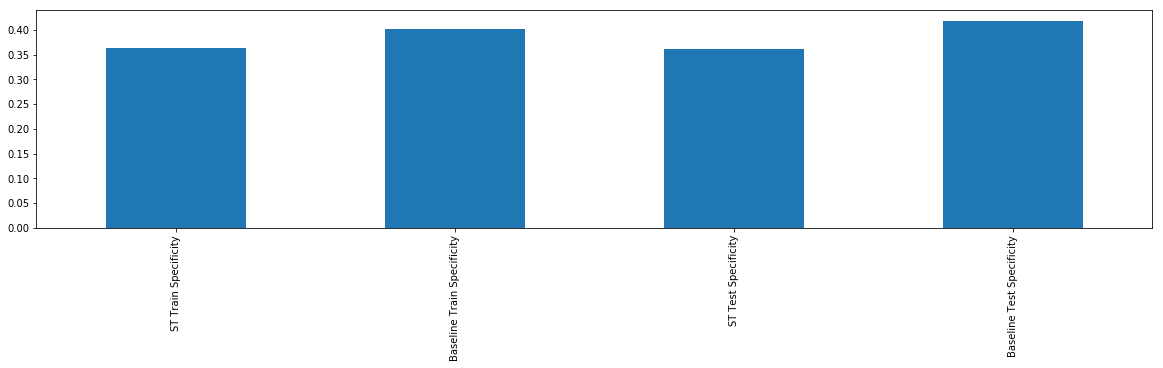

In [55]:
spec_df.mean().plot(kind='bar')

In [56]:
sens_df

,ST Train Sensitivity,Baseline Train Sensitivity,ST Test Sensitivity,Baseline Test Sensitivity
0,0.966543,0.918216,0.960000,0.920000
1,0.962825,0.918216,0.920000,0.920000
2,0.962825,0.918216,0.960000,0.920000
3,0.959108,0.918216,0.920000,0.920000
4,0.962825,0.918216,0.960000,0.920000
...,...,...,...,...
91,0.942065,0.921914,0.945455,0.945455
92,0.949622,0.921914,0.945455,0.945455
93,0.939547,0.921914,0.936364,0.945455
94,0.949622,0.921914,0.945455,0.945455


(0.9, 1)

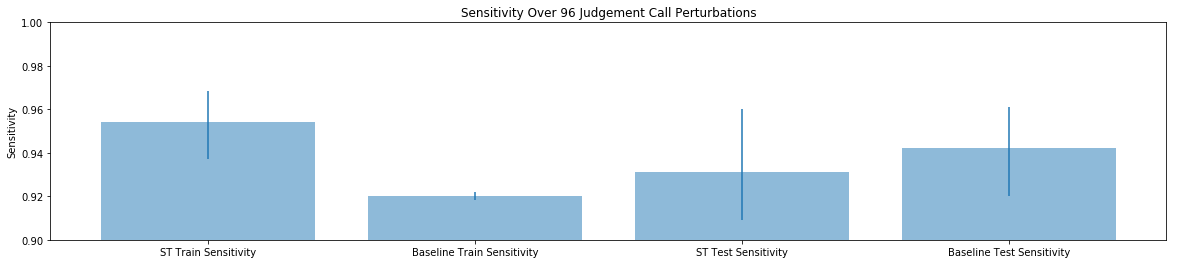

In [57]:
plt.bar(sens_df.columns,list(sens_df.mean()), align='center', alpha = 0.5)
error_stack = np.vstack((sens_df.mean() - sens_df.min(),sens_df.max() - sens_df.mean()))
plt.errorbar(sens_df.columns,list(sens_df.mean()), yerr=error_stack,ls='none')
plt.ylabel('Sensitivity')
plt.title('Sensitivity Over 96 Judgement Call Perturbations')
plt.rcParams["figure.figsize"] = (20,4)
plt.ylim([0.9,1])

(0.3, 0.45)

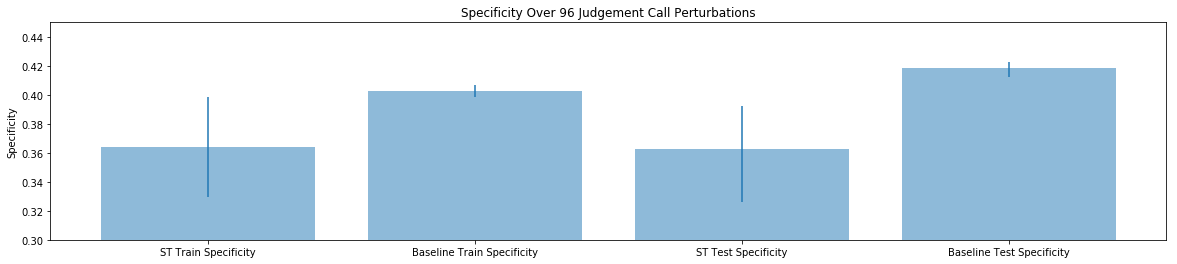

In [58]:
plt.bar(spec_df.columns,list(spec_df.mean()), align='center', alpha = 0.5)
error_stack = np.vstack((spec_df.mean() - spec_df.min(),spec_df.max() - spec_df.mean()))
plt.errorbar(spec_df.columns,list(spec_df.mean()), yerr=error_stack,ls='none')
plt.ylabel('Specificity')
plt.title('Specificity Over 96 Judgement Call Perturbations')
plt.rcParams["figure.figsize"] = (20,4)
plt.ylim([0.3,.45])